In this exercise, we are dealing with the temperature data at Blackford hill. As usual, I downloaded the CSV file and put it in my computer. I think they are csv files so we will load them using pd. But then, I realise that there are 108 of them so it's a question of how to read multiple csv files

In [1]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
path = "edinburgh_temperatures"
all_csv_files = glob.glob(path + "/*.csv")
all_csv_files # When we check the length, it returns 108. But checking the list, it is the titles of all the csv files present in that folder

[]

Now that we have established a pathway for all the files, we go to combine them while dropping the first 90 and the last one column in each file. There are several more compact methods but they are a bit more complicated. It is worth asking in class about these methods

In [2]:
li = []
n = 1
for filename in all_csv_files:
    df = pd.read_csv(filename, index_col=None, header = 0, skiprows=90)
    df.drop(df.tail(n).index,inplace = True)# With this extra line, we expect the number of rows to move from 38950 to 28950-108 since we have 108 csv files, each we are removing the last line. When run, it reduces to 38842 which is exactly what we would want to have
    li.append(df) # This stores all the read data into the empty list that we created before

df = pd.concat(li, axis = 0, ignore_index=True) #To convert it back to a dataframe, we use the .concat method which is provided for in pandas.
df

ValueError: No objects to concatenate

Now the next step is to extract the specific columns that we need and save these to the new dataframe

In [ ]:
#This is the second method
df_2 = df.filter(["ob_end_time", "max_air_temp", "min_air_temp"], axis = 1) # Identifies the selected columns, filters them and pastes them to a new dataframe. What does the axis = 1 mean though?
df_2 = df_2.dropna(inplace = False) # deletes all the rows that contain a NaN value. It is important that the inplace is set to False otherwise the next step does not work
df_2

,ob_end_time,max_air_temp,min_air_temp
1,1896-01-02 09:00:00,10.6,8.9
2,1896-01-03 09:00:00,11.1,5.6
3,1896-01-04 09:00:00,8.9,4.4
4,1896-01-05 09:00:00,7.2,2.8
5,1896-01-06 09:00:00,3.9,0.6
...,...,...,...
38836,2003-05-27 09:00:00,17.2,11.2
38837,2003-05-28 09:00:00,16.3,13.0
38838,2003-05-29 09:00:00,17.2,11.6
38839,2003-05-30 09:00:00,20.0,12.2


The next question it to identify the lowest and highest temperature. We want to loop through the first column and pick the highest temperature, then identify the date. Then we want to do the same with the second column - identify lowest temperature of the recorded lows and then print out the date that corresponds to it. 

In [ ]:
maximum_temperature = df_2["max_air_temp"].max()
minimum_temperature = df_2["min_air_temp"].min()

print("The lowest temperature is:", minimum_temperature, "degrees celcius which was recorded on:", df_2["ob_end_time"].loc[df_2["min_air_temp"] == minimum_temperature])

print("The highest temperature is:", maximum_temperature, " degrees celcius which was recorded on:", df_2["ob_end_time"].loc[df_2["max_air_temp"] == maximum_temperature])

The lowest temperature is: -11.4 degrees celcius which was recorded on: 31392    1982-01-11 09:00:00
Name: ob_end_time, dtype: object
The highest temperature is: 29.8  degrees celcius which was recorded on: 29041    1975-08-05 09:00:00
Name: ob_end_time, dtype: object


We have got express instructions to create a scatterplot for specific dates and months across the years. To do this, the approach we will take is that of filters to create a new dataframe. We will separate the date information into day, month and year then use double filtration to create new dataframes which we will, then, plot

C:\Users\User\AppData\Local\Temp\ipykernel_19380\1622254051.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  July_dataframe = First_dataframe[df_2["July boolean"]] # This reduces to 103 rows which is now what we are going to plot


103


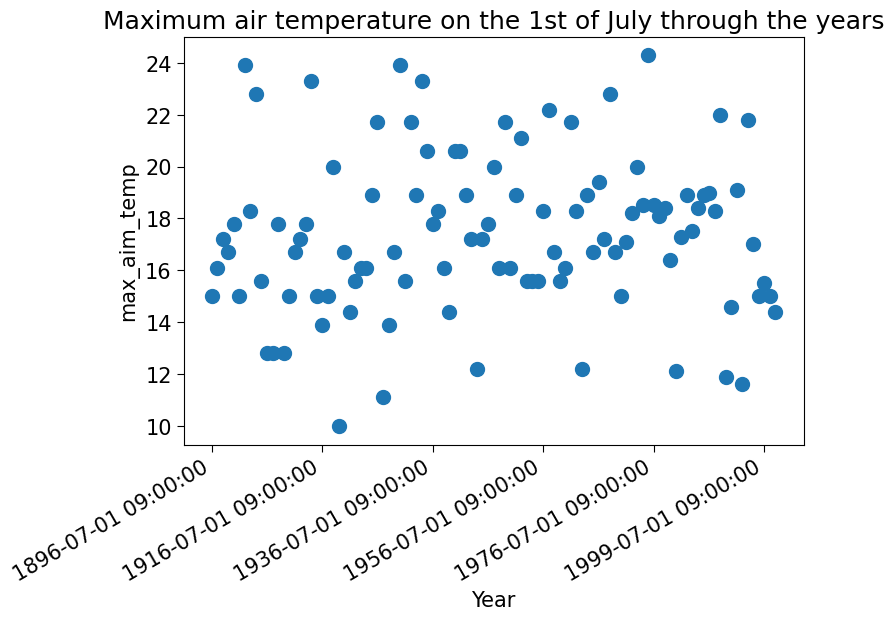

In [ ]:
df_2["Day"] = pd.DatetimeIndex(df_2["ob_end_time"]).day #This extracts the date
df_2["Month"] = pd.DatetimeIndex(df_2["ob_end_time"]).month #This extracts the month
df_2["Year"] = pd.DatetimeIndex(df_2["ob_end_time"]).year #This extracts the years
df_2 # This returns 37837 rows

#Now we move on to applying the filter. However, this filter applies only on lists and not dataframes hence the need to convert to numpy first
day_array = df_2["Day"].to_numpy()
month_array = df_2["Month"].to_numpy()
day_filter = df_2["Day"]==1
df_2["Date 1st boolean"] = day_filter
month_filter = df_2["Month"] == 7
df_2["July boolean"] = month_filter
df_2.head(50)
#Note that with this, we are creating boolean filters then appending them as extra columns then using them to filter down

First_dataframe = df_2[df_2["Date 1st boolean"]]# When run, this reduces to 1231 rows
July_dataframe = First_dataframe[df_2["July boolean"]] # This reduces to 103 rows which is now what we are going to plot
July_dataframe

#Then the construction of the scatterplot itself.
# plt.scatter(July_dataframe["ob_end_time"], July_dataframe["max_air_temp"])
# plt.show()
#This works but is not object oriented

plt.rcParams.update(
    {
        "lines.markersize":10, #Big font?
        "font.size": 15,
        "xtick.major.size": 5.0,
        "ytick.major.size": 5.0
    }
)
fig, ax = plt.subplots(figsize = [8,6])
ax.scatter(July_dataframe["ob_end_time"], July_dataframe["max_air_temp"])

ax.set_xlabel("Year")
ax.set_ylabel("max_aim_temp")
ax.set_title("Maximum air temperature on the 1st of July through the years")


#to fix the date axis
fig.autofmt_xdate()
dates = July_dataframe["ob_end_time"].to_numpy()
print(len(dates))
ax.set_xticks([dates[i] for i in range(0,len(dates),20)])

plt.show()

The next requirement is for us to produce a scatterplot for the 25th of December every year.
Again, this is the same approach but with implementation of new filters

C:\Users\User\AppData\Local\Temp\ipykernel_19380\3803816128.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Dec_dataframe = First_dataframe[df_2["July boolean"]] # This reduces to 103 rows which is now what we are going to plot


103


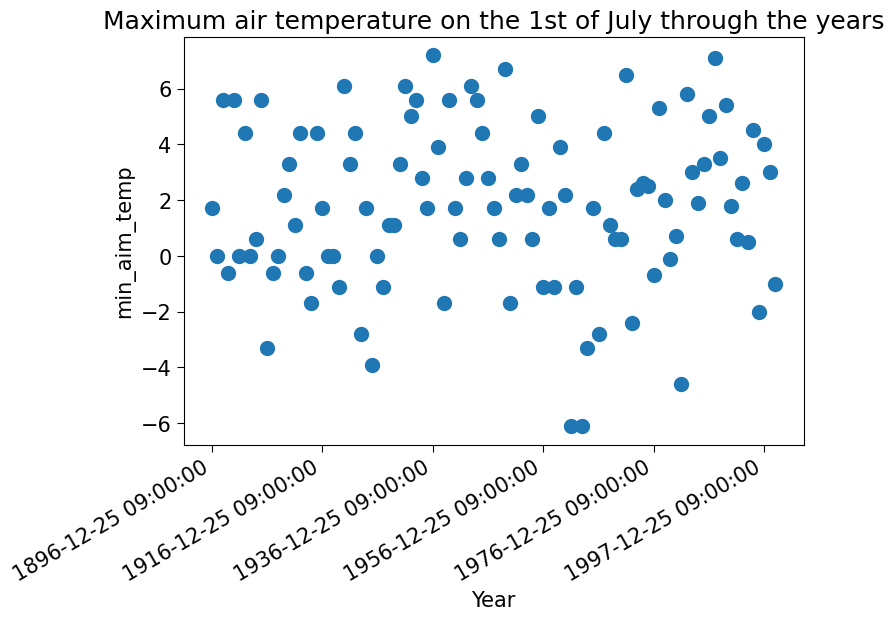

In [ ]:
df_2["Day"] = pd.DatetimeIndex(df_2["ob_end_time"]).day #This extracts the date
df_2["Month"] = pd.DatetimeIndex(df_2["ob_end_time"]).month #This extracts the month
df_2["Year"] = pd.DatetimeIndex(df_2["ob_end_time"]).year #This extracts the years
df_2 # This returns 37837 rows

#Now we move on to applying the filter. However, this filter applies only on lists and not dataframes hence the need to convert to numpy first
day_array = df_2["Day"].to_numpy()
month_array = df_2["Month"].to_numpy()
day_filter = df_2["Day"]==25
df_2["Date 1st boolean"] = day_filter
month_filter = df_2["Month"] == 12
df_2["July boolean"] = month_filter
df_2.head(50)
#Note that with this, we are creating boolean filters then appending them as extra columns then using them to filter down

First_dataframe = df_2[df_2["Date 1st boolean"]]# When run, this reduces to 1231 rows
Dec_dataframe = First_dataframe[df_2["July boolean"]] # This reduces to 103 rows which is now what we are going to plot
Dec_dataframe

#Then the construction of the scatterplot itself.
# plt.scatter(July_dataframe["ob_end_time"], July_dataframe["max_air_temp"])
# plt.show()
#This works but is not object oriented

plt.rcParams.update(
    {
        "lines.markersize":10, #Big font?
        "font.size": 15,
        "xtick.major.size": 5.0,
        "ytick.major.size": 5.0
    }
)
fig, ax = plt.subplots(figsize = [8,6])
ax.scatter(Dec_dataframe["ob_end_time"], Dec_dataframe["min_air_temp"])

ax.set_xlabel("Year")
ax.set_ylabel("min_aim_temp")
ax.set_title("Maximum air temperature on the 1st of July through the years")


#to fix the date axis
fig.autofmt_xdate()
dates = Dec_dataframe["ob_end_time"].to_numpy()
print(len(dates))
ax.set_xticks([dates[i] for i in range(0,len(dates),20)])

plt.show()
#print(len(Dec_dataframe)) Interestingly, this returns 103 rows as well. Which kind of makes sense since we are picking one date of the year per year for the 103 year duration

The next thing is a scatterplot showing the average for maximum temperatures for each year. We want to do two things - we want to compute yearly average then we want to reduce all the 12 months in a year into one value then append both these values into a new dataframe
For the average, we can set filters but how? We can use the .groupby method

In [ ]:
#df_2
yearly_max_temp_mean = df_2.groupby(["Year"])["max_air_temp"].mean() #how does this work? This chooses all the datapoints with the year 1896, for example, and places them into a group - a temporary dataframe. Then the [max_aim_temp] instructs for the program to look into the 1986 group and extract the data in the max_air_temp column, then we call for it to perform the mean

print(type(yearly_max_temp_mean))


<class 'pandas.core.series.Series'>


In [ ]:
#To do for both maximum and minimum
yearly_mean_dataframe = df_2.groupby(["Year"])["max_air_temp", "min_air_temp"]. mean() # This returns a multi-index dataframe which is difficult to deal with hence add argument as shown in the next section
print(yearly_mean_dataframe)

      max_air_temp  min_air_temp
Year                            
1896     11.503562      5.207123
1897     11.247671      4.761918
1898     12.300822      5.568493
1899     11.846027      4.977808
1900     10.968956      5.019780
...            ...           ...
1999     13.415880      6.212446
2000     12.226537      5.295469
2001     12.786646      6.011180
2002     12.833427      5.990169
2003     10.654000      2.935333

[108 rows x 2 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_19380\1130418058.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_mean_dataframe = df_2.groupby(["Year"])["max_air_temp", "min_air_temp"].mean()


C:\Users\User\AppData\Local\Temp\ipykernel_19380\3824959291.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_mean_dataframe = df_2.groupby(["Year"], as_index=False)["max_air_temp", "min_air_temp"]. mean() # This returns a multi-index dataframe which is difficult to deal with hence add argument as shown in the next section


     Year  max_air_temp  min_air_temp
0    1896     11.503562      5.207123
1    1897     11.247671      4.761918
2    1898     12.300822      5.568493
3    1899     11.846027      4.977808
4    1900     10.968956      5.019780
..    ...           ...           ...
103  1999     13.415880      6.212446
104  2000     12.226537      5.295469
105  2001     12.786646      6.011180
106  2002     12.833427      5.990169
107  2003     10.654000      2.935333

[108 rows x 3 columns]
108


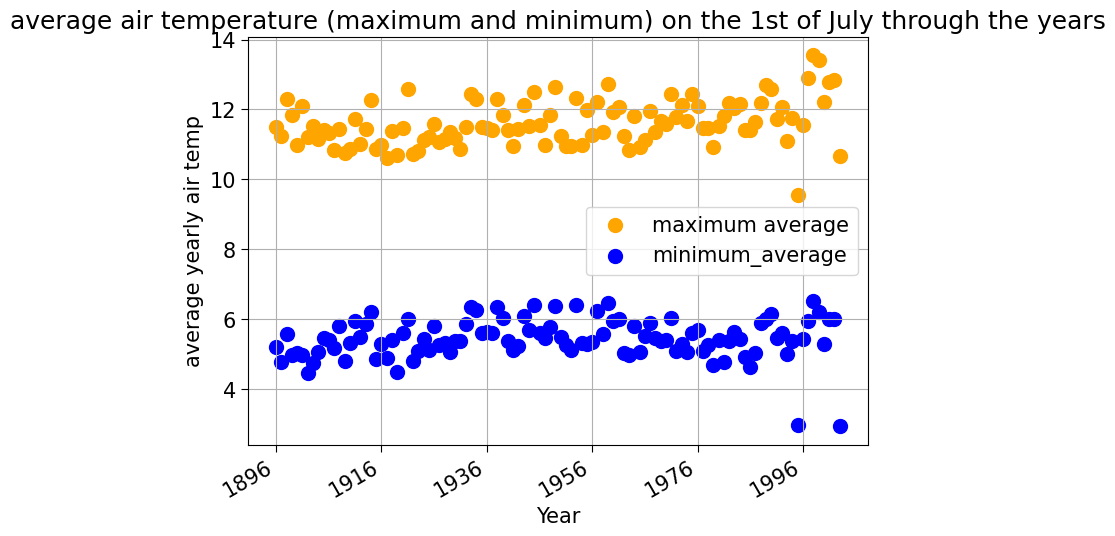

In [ ]:
yearly_mean_dataframe = df_2.groupby(["Year"], as_index=False)["max_air_temp", "min_air_temp"]. mean() # This returns a multi-index dataframe which is difficult to deal with hence add argument as shown in the next section
print(yearly_mean_dataframe)
#Now this helps us ensure that we are still dealing with the dataframe. The next step is to now plot

plt.rcParams.update(
    {
        "lines.markersize":10, #Big font?
        "font.size": 15,
        "xtick.major.size": 5.0,
        "ytick.major.size": 5.0
    }
)
fig, ax = plt.subplots(figsize = [8,6])
ax.scatter(yearly_mean_dataframe["Year"], yearly_mean_dataframe["max_air_temp"], label = "maximum average", color = 'orange') #we are setting this colour to orange
ax.scatter(yearly_mean_dataframe["Year"], yearly_mean_dataframe["min_air_temp"], label = "minimum_average", color = 'blue') #we are setting this colour to blue

ax.set_xlabel("Year")
ax.set_ylabel("average yearly air temp")
ax.set_title("average air temperature (maximum and minimum) on the 1st of July through the years")


#to fix the date axis
fig.autofmt_xdate()
dates = yearly_mean_dataframe["Year"].to_numpy()
print(len(dates))
ax.set_xticks([dates[i] for i in range(0,len(dates),20)])

ax.legend(loc = "best") #This should help us set the legend. The loc allows for us to choose where the legend appears. I chose best which allows for the program to decide. Other choices include center, upper center, lower center. Always enter them as a string though
ax.grid(True)


plt.show()

#This automatically fixed the colours for me. What if I want to fix the colours myself?

The final question is to now compute the correlation coefficient

In [ ]:
import numpy as np
coefficient = np.corrcoef(yearly_mean_dataframe["max_air_temp"], yearly_mean_dataframe["min_air_temp"])
print(coefficient)
#When run, this returns a matrix
#[[1.         0.74869528]
# [0.74869528 1.        ]]
#What does this mean? I am not sure but it is worth thinking about later on

[[1.         0.74869528]
 [0.74869528 1.        ]]
